In [1]:
# Knapsack problem solved classically and through DWave

# Part 2- Building the QUBO

# Detailed explanation is provided
# (c)2020 Alex Khan

In [2]:
# In the knapsack problem we have a list of items i, from i=1 to i=N
# Each item has a weight w(i)
# and cost( equivalent to its value or price) c(i)

# The constraint is that the weight cannot exceed the capacity of the knapsack w_capacity

# The goal is to find a combination of items i_list where the maximum value c_max is achieved without 
# exceeding w_capacity. The maximum weight being carried would then be w_max for those items.

In [3]:
# A number of approaches are available online, however, I will use an approach using the combination function
# To generate all unique combinations of items that could be filled in the knapsack

# I will then check to ensure the weight capacity is not exceeded. 
# For each combination I will check to see if its value is more than the stored maximum value of previous tries
# If it is more, then I will replace c_max and i_list

# At the end I will present the best option

In [4]:
# The input file is a simple text file with the cost and then weight separated with a comma
# For example:

# 35,12
# 85,27
# 30,10
# 50,17
# 70,20
# 80,10
# 55,15


In [42]:
def import_file(file_name):
    import pandas as pd

    data_file_name="small_data.txt"
    w_capacity=30

    df = pd.read_csv(data_file_name, header=None)
    df.columns = ['cost', 'weight']
    print(df)
    
    c=df['cost']
    w=df['weight']
    return(c,w)

    

In [43]:
c,w=import_file("small_data.txt")
N=len(c)
print('i, cost')

for i in range(N):
    print(i, c[i])

print('i, weight')
for i in range(N):
    print(i, w[i])

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
i, cost
0 35
1 85
2 30
3 50
4 70
5 80
6 55
i, weight
0 12
1 27
2 10
3 17
4 20
5 10
6 15


In [44]:
from itertools import combinations
import numpy as np

for n in range(1,N+1):
    for i_list in combinations(np.arange(N), n):
        
        print(list(i_list))
        

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[0, 1]
[0, 2]
[0, 3]
[0, 4]
[0, 5]
[0, 6]
[1, 2]
[1, 3]
[1, 4]
[1, 5]
[1, 6]
[2, 3]
[2, 4]
[2, 5]
[2, 6]
[3, 4]
[3, 5]
[3, 6]
[4, 5]
[4, 6]
[5, 6]
[0, 1, 2]
[0, 1, 3]
[0, 1, 4]
[0, 1, 5]
[0, 1, 6]
[0, 2, 3]
[0, 2, 4]
[0, 2, 5]
[0, 2, 6]
[0, 3, 4]
[0, 3, 5]
[0, 3, 6]
[0, 4, 5]
[0, 4, 6]
[0, 5, 6]
[1, 2, 3]
[1, 2, 4]
[1, 2, 5]
[1, 2, 6]
[1, 3, 4]
[1, 3, 5]
[1, 3, 6]
[1, 4, 5]
[1, 4, 6]
[1, 5, 6]
[2, 3, 4]
[2, 3, 5]
[2, 3, 6]
[2, 4, 5]
[2, 4, 6]
[2, 5, 6]
[3, 4, 5]
[3, 4, 6]
[3, 5, 6]
[4, 5, 6]
[0, 1, 2, 3]
[0, 1, 2, 4]
[0, 1, 2, 5]
[0, 1, 2, 6]
[0, 1, 3, 4]
[0, 1, 3, 5]
[0, 1, 3, 6]
[0, 1, 4, 5]
[0, 1, 4, 6]
[0, 1, 5, 6]
[0, 2, 3, 4]
[0, 2, 3, 5]
[0, 2, 3, 6]
[0, 2, 4, 5]
[0, 2, 4, 6]
[0, 2, 5, 6]
[0, 3, 4, 5]
[0, 3, 4, 6]
[0, 3, 5, 6]
[0, 4, 5, 6]
[1, 2, 3, 4]
[1, 2, 3, 5]
[1, 2, 3, 6]
[1, 2, 4, 5]
[1, 2, 4, 6]
[1, 2, 5, 6]
[1, 3, 4, 5]
[1, 3, 4, 6]
[1, 3, 5, 6]
[1, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4, 6]
[2, 3, 5, 6]
[2, 4, 5, 6]
[3, 4, 5, 6]
[0, 1, 2, 3, 4]
[0, 

In [8]:
# We will use this loop to find the maximum weight w_max and cost c_max for a list of items i_list staying under w_capacity

In [45]:
def knapsack(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    for n in range(1,N+1):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            if sum(list(i_list),w)<=w_capacity: # if the weight of the current list of items is within the weight capacity
                if sum(list(i_list),c)>c_max:  # if the cost of the current list of items is more than the max cost found so far

                    c_max=sum(list(i_list),c)  #c_max updated the cost of the current list of items
                    w_max=sum(list(i_list),w)  #w_max upated to the weifht of the current items
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))

    return(max_list, c_max, w_max)

In [46]:
max_list=[]
max_list, c_max, w_max=knapsack("small_data.txt", 30)

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[0, 5] 22 115
[3, 5] 27 130
[4, 5] 30 150


In [11]:
print(max_list, w_max, c_max)

[4, 5] 30 150


In [12]:
# Looking at the landscape of values within the weight constraint

In [47]:
def plot_knapsack(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            if sum(list(i_list),w)<=w_capacity: # if the weight of the current list of items is within the weight capacity
                if sum(list(i_list),c)>c_max:  # if the cost of the current list of items is more than the max cost found so far

                    plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
                    plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost with constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight with constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[2] 10 30
[3] 17 50
[4] 20 70
[5] 10 80
[6] 15 55
[0, 2] 22 65
[0, 3] 29 85
[0, 5] 22 115
[0, 6] 27 90
[2, 3] 27 80
[2, 4] 30 100
[2, 5] 20 110
[2, 6] 25 85
[3, 5] 27 130
[4, 5] 30 150
[5, 6] 25 135


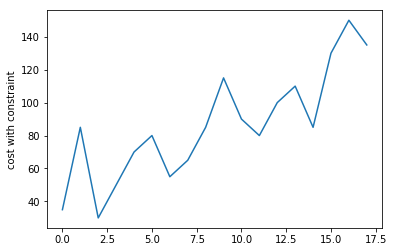

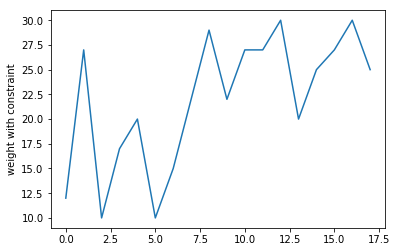

In [48]:
plot_knapsack("small_data.txt", 30)

In [15]:
# Now look at the whole landscape excluding the weight constraint

In [49]:
def plot_all(file_name):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            
            
            plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
            plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
            max_list=list(i_list)
            print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost without constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight without constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 35
[1] 27 85
[2] 10 30
[3] 17 50
[4] 20 70
[5] 10 80
[6] 15 55
[0, 1] 39 120
[0, 2] 22 65
[0, 3] 29 85
[0, 4] 32 105
[0, 5] 22 115
[0, 6] 27 90
[1, 2] 37 115
[1, 3] 44 135
[1, 4] 47 155
[1, 5] 37 165
[1, 6] 42 140
[2, 3] 27 80
[2, 4] 30 100
[2, 5] 20 110
[2, 6] 25 85
[3, 4] 37 120
[3, 5] 27 130
[3, 6] 32 105
[4, 5] 30 150
[4, 6] 35 125
[5, 6] 25 135
[0, 1, 2] 49 150
[0, 1, 3] 56 170
[0, 1, 4] 59 190
[0, 1, 5] 49 200
[0, 1, 6] 54 175
[0, 2, 3] 39 115
[0, 2, 4] 42 135
[0, 2, 5] 32 145
[0, 2, 6] 37 120
[0, 3, 4] 49 155
[0, 3, 5] 39 165
[0, 3, 6] 44 140
[0, 4, 5] 42 185
[0, 4, 6] 47 160
[0, 5, 6] 37 170
[1, 2, 3] 54 165
[1, 2, 4] 57 185
[1, 2, 5] 47 195
[1, 2, 6] 52 170
[1, 3, 4] 64 205
[1, 3, 5] 54 215
[1, 3, 6] 59 190
[1, 4, 5] 57 235
[1, 4, 6] 62 210
[1, 5, 6] 52 220
[2, 3, 4] 47 150
[2, 3, 5] 37 160
[2, 3, 6] 42 135
[2, 4, 5] 40 180
[2, 4, 6] 45 155
[2,

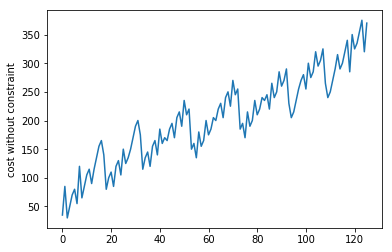

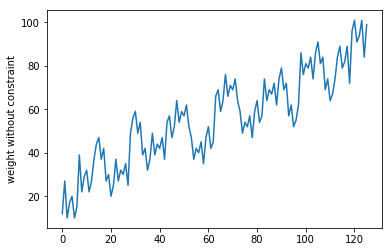

In [50]:
plot_all("small_data.txt")

In [18]:
##### Now it is time to move to creating a QUBO - Quadratic Unconstrained Binary Optimization version of this problem

In [19]:
# The first and most necessary step is to negate the problem. Since we will not be maximizing cost, but we will need to find
# the minimum cost.  Since DWave only finds the lowest energy value, it is important to create a formulation where
# the answer is at a minimum

In [51]:
def plot_all_neg(file_name):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    
    N=len(c)
    for i in range (N):       #negating the cost values
        c[i]=-c[i]
    c_max=0
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): # allcombinations of n items
            
            
            
            plot_c.append(sum(list(i_list),c))  #c_max updated the cost of the current list of items
            plot_w.append(sum(list(i_list),w))  #w_max upated to the weifht of the current items
            max_list=list(i_list)
            print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost without constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight without constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 -35
[1] 27 -85
[2] 10 -30
[3] 17 -50
[4] 20 -70
[5] 10 -80
[6] 15 -55
[0, 1] 39 -120
[0, 2] 22 -65
[0, 3] 29 -85
[0, 4] 32 -105
[0, 5] 22 -115
[0, 6] 27 -90
[1, 2] 37 -115
[1, 3] 44 -135
[1, 4] 47 -155
[1, 5] 37 -165
[1, 6] 42 -140
[2, 3] 27 -80
[2, 4] 30 -100
[2, 5] 20 -110
[2, 6] 25 -85
[3, 4] 37 -120
[3, 5] 27 -130
[3, 6] 32 -105
[4, 5] 30 -150
[4, 6] 35 -125
[5, 6] 25 -135
[0, 1, 2] 49 -150
[0, 1, 3] 56 -170
[0, 1, 4] 59 -190
[0, 1, 5] 49 -200
[0, 1, 6] 54 -175
[0, 2, 3] 39 -115
[0, 2, 4] 42 -135
[0, 2, 5] 32 -145
[0, 2, 6] 37 -120
[0, 3, 4] 49 -155
[0, 3, 5] 39 -165
[0, 3, 6] 44 -140
[0, 4, 5] 42 -185
[0, 4, 6] 47 -160
[0, 5, 6] 37 -170
[1, 2, 3] 54 -165
[1, 2, 4] 57 -185
[1, 2, 5] 47 -195
[1, 2, 6] 52 -170
[1, 3, 4] 64 -205
[1, 3, 5] 54 -215
[1, 3, 6] 59 -190
[1, 4, 5] 57 -235
[1, 4, 6] 62 -210
[1, 5, 6] 52 -220
[2, 3, 4] 47 -150
[2, 3, 5] 37 -160

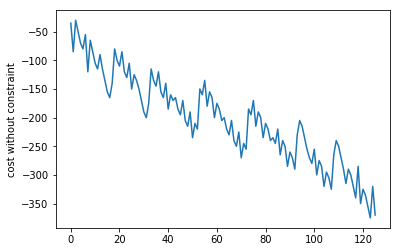

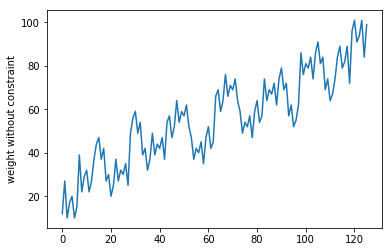

In [52]:
plot_all_neg("small_data.txt")

In [53]:
def plot_knapsack_neg(file_name,w_capacity):
    from itertools import combinations
    import numpy as np
    import matplotlib.pyplot as plt
    
    def sum(i_list, p):
        sum_p=0
        for item in (i_list):
            sum_p+=p[item]
        return(int(sum_p))
    
    c,w=import_file(file_name)
    N=len(c)
    for i in range (N):
        c[i]=-c[i]
    
    c_min=0  # removed c_max
    w_max=0
    max_list=[]
    
    plot_w=[]
    plot_c=[]
    
    for n in range(1,N):  # for groups of items from 1 to N
        for i_list in combinations(np.arange(N), n): 
            
            if sum(list(i_list),w)<=w_capacity: 
                if sum(list(i_list),c)<c_min:  # looking for lower values now

                    plot_c.append(sum(list(i_list),c))  
                    plot_w.append(sum(list(i_list),w))  
                    max_list=list(i_list)
                    print(list(i_list), sum(list(i_list),w), sum(list(i_list),c))
    plt.plot(plot_c)
    plt.ylabel('cost with constraint')
    plt.show()
    plt.plot(plot_w)
    plt.ylabel('weight with constraint')
    plt.show()
    return

   cost  weight
0    35      12
1    85      27
2    30      10
3    50      17
4    70      20
5    80      10
6    55      15
[0] 12 -35
[1] 27 -85
[2] 10 -30
[3] 17 -50
[4] 20 -70
[5] 10 -80
[6] 15 -55
[0, 1] 39 -120
[0, 2] 22 -65
[0, 3] 29 -85
[0, 4] 32 -105
[0, 5] 22 -115
[0, 6] 27 -90
[1, 2] 37 -115
[1, 3] 44 -135
[1, 4] 47 -155
[1, 5] 37 -165
[1, 6] 42 -140
[2, 3] 27 -80
[2, 4] 30 -100
[2, 5] 20 -110
[2, 6] 25 -85
[3, 4] 37 -120
[3, 5] 27 -130
[3, 6] 32 -105
[4, 5] 30 -150
[4, 6] 35 -125
[5, 6] 25 -135
[0, 1, 2] 49 -150
[0, 1, 5] 49 -200
[0, 2, 3] 39 -115
[0, 2, 4] 42 -135
[0, 2, 5] 32 -145
[0, 2, 6] 37 -120
[0, 3, 4] 49 -155
[0, 3, 5] 39 -165
[0, 3, 6] 44 -140
[0, 4, 5] 42 -185
[0, 4, 6] 47 -160
[0, 5, 6] 37 -170
[1, 2, 5] 47 -195
[2, 3, 4] 47 -150
[2, 3, 5] 37 -160
[2, 3, 6] 42 -135
[2, 4, 5] 40 -180
[2, 4, 6] 45 -155
[2, 5, 6] 35 -165
[3, 4, 5] 47 -200
[3, 5, 6] 42 -185
[4, 5, 6] 45 -205
[0, 2, 3, 5] 49 -195
[0, 2, 5, 6] 47 -200


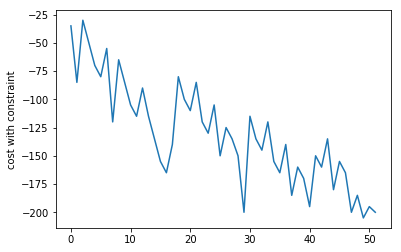

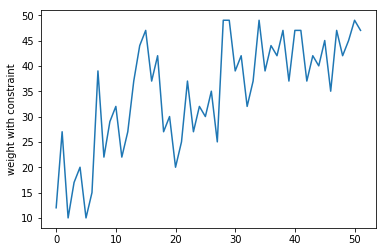

In [54]:
plot_knapsack_neg("small_data.txt", 50)

In [55]:
# How do we build a QUBO that will retain this property. It needs to find item combinations with the lowest cost, 
# without violating the weight constraints

In [56]:
# Lets start with just placing the cost which we are trying to minimize on the diagonal values of a matrix
# and we can place the weights on the non-diagonal terms. 

# This matrix will be the cost that adds up as each item is added. We will keep the cost negative to minimize this.

In [57]:
N=len(c)
Mc = np.zeros([N,N],dtype=float)
for i in range(N):
    Mc[i][i] =-c[i]

In [58]:
print(Mc)

[[-35.   0.   0.   0.   0.   0.   0.]
 [  0. -85.   0.   0.   0.   0.   0.]
 [  0.   0. -30.   0.   0.   0.   0.]
 [  0.   0.   0. -50.   0.   0.   0.]
 [  0.   0.   0.   0. -70.   0.   0.]
 [  0.   0.   0.   0.   0. -80.   0.]
 [  0.   0.   0.   0.   0.   0. -55.]]


In [26]:
# Since adding each item results in a weight, it is important to find a matrix which can represent the weight
# contribution for the items selected

In [59]:
N=len(c)
Mw = np.zeros([N,N],dtype=float)
for i in range(N):
    Mw[i][i] =w[i]

In [60]:
print(Mw)

[[12.  0.  0.  0.  0.  0.  0.]
 [ 0. 27.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0.  0. 17.  0.  0.  0.]
 [ 0.  0.  0.  0. 20.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.  0. 15.]]


In [29]:
# How can we find a way to use the weight as a limiting factor as each item is picked. In other words, we want 
# to use the quadratic terms as a penalty as pairs of items are picked. 

# We will use the product of the weights and add those to the non-diagonal terms. Since QUBO is only one half of the
# Matrix, we will multiply this by 2 (NOTE: if in reality you need both sides of the matrix, multiply by 2 when using in DWave)
# Also, since we are adding a product of 2 weights on the non-diagonal terms, we will also add a product of the weight
# on the linear terms as well. This is to keep the matrix balanced. 

In [80]:
N=len(c)
Mx = np.zeros([N,N],dtype=float)
for i in range(N):
    for j in range(N):
        if i==j:
            Mx[i][i] =3*w[i]**2-c[i]
        elif i<j:
            Mx[i][j]=-2*w[i]*w[j]

In [81]:
print(Mx)

[[  397.  -648.  -240.  -408.  -480.  -240.  -360.]
 [    0.  2102.  -540.  -918. -1080.  -540.  -810.]
 [    0.     0.   270.  -340.  -400.  -200.  -300.]
 [    0.     0.     0.   817.  -680.  -340.  -510.]
 [    0.     0.     0.     0.  1130.  -400.  -600.]
 [    0.     0.     0.     0.     0.   220.  -300.]
 [    0.     0.     0.     0.     0.     0.   620.]]


In [32]:
# How would the results of this matrix compare to the classical results. Lets execute the matrix brute force and plot

In [63]:
def DWaveSamplerQ(Q,plot_limit):
    from itertools import combinations
    import numpy as np
    
    import random
    import math
    import matplotlib.pyplot as plt
    
    def nCr(n,r):
        f = math.factorial
        return int(f(n) / f(r) / f(n-r))
    
    def random_combination(iterable, r):
        "Random selection from itertools.combinations(iterable, r)"
        pool = tuple(iterable)
        n = len(pool)
        indices = sorted(random.sample(range(n), r))
        return list(tuple(pool[i] for i in indices))
    
    def sum(i_list, Q):
        sum_l=0
        sum_q=0
        for i in (i_list):
            sum_l+=Q[i][i]
        for i in (i_list):
            for j in (i_list):
                if i<j:
                    sum_q+=Q[i][j]
            
        return(sum_l+sum_q)
    
   
    N=len(Q[0])
    t= (2**N)-1
    
    e_min=9999999
    count=0
    min_list=[]
    plot_data=[]
    for n in range(1,N):  # for groups of items from 1 to N
        comb=nCr(N,n)
        #print('--m ', m, comb)
        if comb==1:
            combf=1
        elif comb>plot_limit*2:
            combf=plot_limit
        else:
            combf=int(comb/2)
        
        for i in range (combf):
            i_list=random_combination(range(N), n)
            plot_data.append(sum(list(i_list),Q))
            
            if sum(list(i_list),Q)<e_min:  

                    e_min=sum(list(i_list),Q)  
                    
                    min_list=list(i_list)
                    print(list(i_list), sum(list(i_list),Q))
            count+=1
    plt.plot(plot_data)
    plt.ylabel('Energy')
    # use if needing log scale on y-axis
    #plt.yscale('log')
    
    plt.show()
    print('Best found:', min_list)
    print('Energy:', e_min)
    print('From:', count, ' samples')
    print('Possible solutions:', t)
    return

def valueQ(i_list, Q):
    
    N=len(Q[0])
    t= (2**N)-1
    sum_l=0
    sum_q=0
    for i in (i_list):
        sum_l+=Q[i][i]
    for i in (i_list):
        for j in (i_list):
            if i<j:
                sum_q+=Q[i][j]

    return(sum_l+sum_q)

[5] 220.0
[0, 2, 5] 207.0
[1, 3, 4, 6] 71.0
[2, 3, 5, 6] -63.0
[0, 2, 3, 5] -64.0
[0, 3, 4, 5, 6] -1134.0
[0, 1, 2, 3, 4, 5] -2518.0
[0, 1, 2, 3, 4, 6] -2978.0


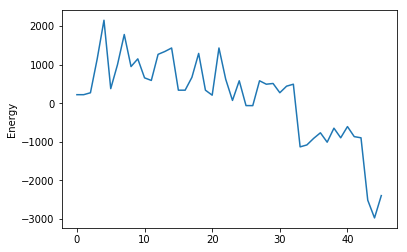

Best found: [0, 1, 2, 3, 4, 6]
Energy: -2978.0
From: 46  samples
Possible solutions: 127


In [82]:
# try what Mc, Mw and Mx looks like
DWaveSamplerQ(Mx,10)

In [35]:
# How do we constrain weight so that weight does not exceed w_capacity and how do we tie cost and weight together in the qubo 

In [37]:
# We will add x terms for the items, and y terms for a weight counter.  

#    x0,x1,x2.....xN,y0,y1,..yM
# x0
# .
# .
# .
# xN
# y0
# .
# .
# yM

In [83]:
def knapsack_matrix(costs, weights, weight_capacity):
    from math import log, ceil
    

    # Initialize BQM - use large-capacity BQM so that the problem can be
    # scaled by the user.
    #bqm = dimod.AdjVectorBQM(dimod.Vartype.BINARY)

    # Lagrangian multiplier
    # First guess as suggested in Lucas's paper
    lagrange = max(costs)

    # Number of objects
    x_size = len(costs)
    
    
    
    
    # Lucas's algorithm introduces additional slack variables to handle
    # the inequality. max_y_index indicates the maximum index in the y
    # sum; hence the number of slack variables.
    max_y_index = ceil(log(weight_capacity))
    
    M=[[0. for i in range(x_size+max_y_index)] for j in range(x_size+max_y_index)]
    
    
    # Slack variable list for Lucas's algorithm. The last variable has
    # a special value because it terminates the sequence.
    y = [2**n for n in range(max_y_index - 1)]
    y.append(weight_capacity + 1 - 2**(max_y_index - 1))

    # Hamiltonian xi-xi terms <---- These are the linear terms for each item
    for k in range(x_size):
        #bqm.set_linear('x' + str(k), lagrange * (weights[k]**2) - costs[k])
        M[k][k]=lagrange * (weights[k]**2) - costs[k]

    # Hamiltonian xi-xj terms  <------ These are the quadratic terms for each item
    for i in range(x_size):
        for j in range(i + 1, x_size):
            M[i][j] = 2 * lagrange * weights[i] * weights[j]
   
    
    
    # Hamiltonian y-y terms  <------ These are teh linear terms for the weight penalty
    for k in range(max_y_index):
        M[k+x_size][k+x_size]= lagrange * (y[k]**2)

    # Hamiltonian yi-yj terms <------These are the quadratic terms for the weight penalty
    for i in range(max_y_index):
        for j in range(i + 1, max_y_index):
            #print(2 * lagrange * y[i] * y[j])
            M[i+x_size][j+x_size] = 2 * lagrange * y[i] * y[j]
    
    
    
    # Hamiltonian x-y terms   <----------These terms connect the items to the weight penalty
    for i in range(x_size):
        for j in range(max_y_index):
            #print(i,j)
            M[i][j+x_size] = -2 * lagrange * weights[i] * y[j]

    print('weight penalty values',y)        
    return (M)

In [84]:
#data_file_name = sys.argv[1] if len(sys.argv) > 1 else "data.txt"
M=[]
import pandas as pd
data_file_name="small_data.txt"
#weight_capacity = float(sys.argv[2]) if len(sys.argv) > 2 else 70
weight_capacity=30
# parse input data
df = pd.read_csv(data_file_name, header=None)
df.columns = ['cost', 'weight']

#bqm = knapsack_bqm(df['cost'], df['weight'], weight_capacity)
M=knapsack_matrix(df['cost'], df['weight'], weight_capacity)

weight penalty values [1, 2, 4, 23]


In [85]:
print(M)

[[12205, 55080, 20400, 34680, 40800, 20400, 30600, -2040, -4080, -8160, -46920], [0.0, 61880, 45900, 78030, 91800, 45900, 68850, -4590, -9180, -18360, -105570], [0.0, 0.0, 8470, 28900, 34000, 17000, 25500, -1700, -3400, -6800, -39100], [0.0, 0.0, 0.0, 24515, 57800, 28900, 43350, -2890, -5780, -11560, -66470], [0.0, 0.0, 0.0, 0.0, 33930, 34000, 51000, -3400, -6800, -13600, -78200], [0.0, 0.0, 0.0, 0.0, 0.0, 8420, 25500, -1700, -3400, -6800, -39100], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19070, -2550, -5100, -10200, -58650], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 85, 340, 680, 3910], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 340, 1360, 7820], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1360, 15640], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 44965]]


In [86]:
#         0       1     2       3      4      5      6          7      8     9       10
#        x0      x1    x2      x3     x4     x5     x6         y1     y2     y3      y4  
#  x0 [[12205, 55080, 20400, 34680, 40800, 20400,  30600,    -2040, -4080, -8160,  -46920], 
#  x1  [0.0,   61880, 45900, 78030, 91800, 45900,  68850,    -4590, -9180, -18360, -105570], 
#  x2  [0.0,    0.0,   8470, 28900, 34000, 17000,  25500,    -1700, -3400, -6800,  -39100], 
#  x3  [0.0,    0.0,   0.0,  24515, 57800, 28900,  43350,    -2890, -5780, -11560, -66470], 
#  x4  [0.0,    0.0,   0.0,   0.0,  33930, 34000,  51000,    -3400, -6800, -13600, -78200], 
#  x5  [0.0,    0.0,   0.0,   0.0,   0.0,   8420,  25500,    -1700, -3400, -6800,  -39100], 
#  x6  [0.0,    0.0,   0.0,   0.0,   0.0,   0.0,   19070,    -2550, -5100, -10200, -58650],

#  y1  [0.0,    0.0,   0.0,   0.0,   0.0,   0.0,    0.0,       85,    340,    680,  3910], 
#  y2  [0.0,    0.0,   0.0,   0.0,   0.0,   0.0,    0.0,       0.0,   340,   1360,  7820], 
#  y3  [0.0,    0.0,   0.0,   0.0,   0.0,   0.0,    0.0,       0.0,   0.0,   1360,  15640], 
#  y4  [0.0,    0.0,   0.0,   0.0,   0.0,   0.0,    0.0,       0.0,   0.0,    0.0,  44965]]

In [ ]:
# Questions:
# Where are the x linear terms, x quadratic terms, y linear terms, y quadratic terms, and x-y interaction terms?
# Can we get lower energy values than the optimal?
# Why did we use the lagrange multiplier max (costs)?

In [ ]:
# Qubo requirements:
# 1. Sum of the linear and quadratic have to equal the value
# 2. As items are picked lower energy values only come from using the y values
# 3. As the items fill up, max weight is coded in y4 in such a way that it forces the energy to be too high.
# 4. In general we have the right answer if 7,8,9,10 are ALL in the solution.  Why?

# These values are quite high.  In actuality, DWave only solves for values between -1 and +1.  
# So this matrix is scaled by DWave.

[7] 85
[5, 6, 7, 10] -50
[0, 6, 9, 10] -90


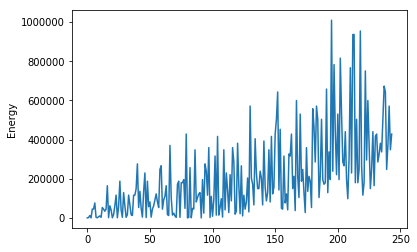

Best found: [0, 6, 9, 10]
Energy: -90
From: 244  samples
Possible solutions: 2047


In [88]:
DWaveSamplerQ(M,30)

In [ ]:
[6] 19070
[8] 340
[0, 5, 10] -30
[1, 9, 10] -85
[3, 5, 9, 10] -130
[4, 5, 7, 8, 9, 10] -150

Best found: [4, 5, 7, 8, 9, 10]
Energy: -150
From: 1020  samples
Possible solutions: 2047

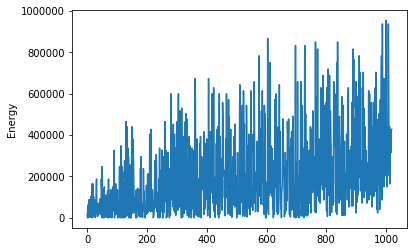

In [ ]:
# Lets now Run it on DWave

In [143]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dimod

In [171]:
dim=len(M)
linear={('a'+str(k), 'a'+str(k)):M[k][k] for k in range(dim)}

quadratic={('a'+str(i+1), 'a'+str(j)):M[i+1][j] for i in range(dim) for j in range(dim) if j>i+1}
QDwave = dict(linear)
QDwave.update(quadratic)
#QDwave.update('dimod.Vartype.BINARY')
print(QDwave)

{('a0', 'a0'): 12205, ('a1', 'a1'): 61880, ('a2', 'a2'): 8470, ('a3', 'a3'): 24515, ('a4', 'a4'): 33930, ('a5', 'a5'): 8420, ('a6', 'a6'): 19070, ('a7', 'a7'): 85, ('a8', 'a8'): 340, ('a9', 'a9'): 1360, ('a10', 'a10'): 44965, ('a1', 'a2'): 45900, ('a1', 'a3'): 78030, ('a1', 'a4'): 91800, ('a1', 'a5'): 45900, ('a1', 'a6'): 68850, ('a1', 'a7'): -4590, ('a1', 'a8'): -9180, ('a1', 'a9'): -18360, ('a1', 'a10'): -105570, ('a2', 'a3'): 28900, ('a2', 'a4'): 34000, ('a2', 'a5'): 17000, ('a2', 'a6'): 25500, ('a2', 'a7'): -1700, ('a2', 'a8'): -3400, ('a2', 'a9'): -6800, ('a2', 'a10'): -39100, ('a3', 'a4'): 57800, ('a3', 'a5'): 28900, ('a3', 'a6'): 43350, ('a3', 'a7'): -2890, ('a3', 'a8'): -5780, ('a3', 'a9'): -11560, ('a3', 'a10'): -66470, ('a4', 'a5'): 34000, ('a4', 'a6'): 51000, ('a4', 'a7'): -3400, ('a4', 'a8'): -6800, ('a4', 'a9'): -13600, ('a4', 'a10'): -78200, ('a5', 'a6'): 25500, ('a5', 'a7'): -1700, ('a5', 'a8'): -3400, ('a5', 'a9'): -6800, ('a5', 'a10'): -39100, ('a6', 'a7'): -2550, ('a6

In [163]:
chainstrength = 15
numruns = 100

#clique = nx.complete_graph(7).edges()
#target_graph = nx.random_regular_graph(d=4, n=30).edges()
#embedding = find_embedding(clique, target_graph)
#print(embedding)

sampler = EmbeddingComposite(DWaveSampler())

response = sampler.sample_qubo(QDwave, chain_strength=chainstrength, num_reads=numruns)
print(response)

   a0 a1 a10 a2 a3 a4 a5 a6 a7 a8 a9  energy num_oc. chain_b.
1   0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
5   0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
10  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
14  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.636364
15  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
18  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.545455
20  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.818182
21  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.545455
22  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
25  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.636364
31  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.818182
34  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.454545
39  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.636364
40  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.636364
42  0  0   1  1  0  1  0  0  1  1  1  -100.0       1 0.727273
44  0  0

In [ ]:
# Question Why do we get so many chainbreaks

In [164]:
from dwave.system import LeapHybridSampler
import dimod

In [ ]:
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Next line executes on DWave xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
bqm = dimod.BinaryQuadraticModel(QDwave, dimod.Vartype.BINARY)
sampler = LeapHybridSampler()
sampleset = sampler.sample(bqm)


 

In [199]:
print(sampleset.record.sample)

[[0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.]]


In [220]:
for sample, energy in zip(sampleset.record.sample, sampleset.record.energy):

    
    solution = []
    items=[]
    for this_bit_index, this_bit in enumerate(sample):
        
        this_var = sampleset.variables[this_bit_index]
        
        if this_bit and this_var.startswith('a') and int(this_var[1:])<=6:
            items.append(this_var)
            solution.append(df['weight'][int(this_var[1:])])
    print("Found solution {} weights {} value {}.".format(items, solution, -1*energy))

 

Found solution ['a4', 'a5'] weights [20, 10] value 150.0.


In [151]:
# Copyright 2020 D-Wave Systems Inc.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import pandas as pd
import sys
from dwave.system import LeapHybridSampler
from math import log, ceil
import dimod

# From Andrew Lucas, NP-hard combinatorial problems as Ising spin glasses
# Workshop on Classical and Quantum Optimization; ETH Zuerich - August 20, 2014
# based on Lucas, Frontiers in Physics _2, 5 (2014)


def knapsack_bqm(costs, weights, weight_capacity):

    costs = costs

    # Initialize BQM - use large-capacity BQM so that the problem can be
    # scaled by the user.
    bqm = dimod.AdjVectorBQM(dimod.Vartype.BINARY)

    # Lagrangian multiplier
    # First guess as suggested in Lucas's paper
    lagrange = max(costs)

    # Number of objects
    x_size = len(costs)

    # Lucas's algorithm introduces additional slack variables to handle
    # the inequality. max_y_index indicates the maximum index in the y
    # sum; hence the number of slack variables.
    max_y_index = ceil(log(weight_capacity))

    # Slack variable list for Lucas's algorithm. The last variable has
    # a special value because it terminates the sequence.
    y = [2**n for n in range(max_y_index - 1)]
    y.append(weight_capacity + 1 - 2**(max_y_index - 1))

    # Hamiltonian xi-xi terms
    for k in range(x_size):
        bqm.set_linear('x' + str(k), lagrange * (weights[k]**2) - costs[k])

    # Hamiltonian xi-xj terms
    for i in range(x_size):
        for j in range(i + 1, x_size):
            key = ('x' + str(i), 'x' + str(j))
            bqm.quadratic[key] = 2 * lagrange * weights[i] * weights[j]

    # Hamiltonian y-y terms
    for k in range(max_y_index):
        bqm.set_linear('y' + str(k), lagrange * (y[k]**2))

    # Hamiltonian yi-yj terms
    for i in range(max_y_index):
        for j in range(i + 1, max_y_index):
            key = ('y' + str(i), 'y' + str(j))
            bqm.quadratic[key] = 2 * lagrange * y[i] * y[j]

    # Hamiltonian x-y terms
    for i in range(x_size):
        for j in range(max_y_index):
            key = ('x' + str(i), 'y' + str(j))
            bqm.quadratic[key] = -2 * lagrange * weights[i] * y[j]

    return bqm

In [ ]:
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx Next line executes on DWave xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [152]:
data_file_name = "small_data.txt"
weight_capacity = 30

# parse input data
df = pd.read_csv(data_file_name, header=None)
df.columns = ['cost', 'weight']

bqm = knapsack_bqm(df['cost'], df['weight'], weight_capacity)

sampler = LeapHybridSampler()
sampleset = sampler.sample(bqm)
for sample, energy in zip(sampleset.record.sample, sampleset.record.energy):

    # Build solution from returned bitstring
    solution = []
    for this_bit_index, this_bit in enumerate(sample):
        # The x's indicate whether each object has been selected
        this_var = sampleset.variables[this_bit_index]
        if this_bit and this_var.startswith('x'):
            # Indexing of the weights is different than the bitstring;
            # cannot guarantee any ordering of the bitstring, but the
            # weights are numerically sorted
            solution.append(df['weight'][int(this_var[1:])])
    print("Found solution {} at energy {}.".format(solution, energy))

Found solution [20, 10] at energy -150.0.


In [ ]:
# Solution at item 4,5
Found solution [20, 10] at energy -150.0.